<a href="https://colab.research.google.com/github/rodrigolopezlopez/lyft_case/blob/main/Lyft_business_case.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Business   Analyst,   Product   Operations**

# **1. Import libraries**

In [1]:
# Import required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime


# Format
color_pal = sns.color_palette()
pd.set_option('display.precision', 2)
%matplotlib inline

# **2. Loading data**
Retrieving data and review if data was loaded correctly

In [2]:
rides = pd.read_csv('/content/drive/MyDrive/Data/Lyft/ride_ids.csv')
driver = pd.read_csv('/content/drive/MyDrive/Data/Lyft/driver_ids.csv')
rides_timestamp = pd.read_csv('/content/drive/MyDrive/Data/Lyft/ride_timestamps.csv')
"""
rides_complete is a left join from rides and rides_timestamp csv files,
in order to merge all the rides data in a single csv,
to create this new table the PIVOT concept was applied

SELECT
  r.driver_id
  , r.ride_id
  , r.ride_distance
  , r.ride_duration
  , r.ride_prime_time
  , MAX(CASE WHEN t.event = 'requested_at' THEN t.timestamp END) AS requested_at
  , MAX(CASE WHEN t.event = 'accepted_at' THEN t.timestamp END) AS accepted_at
  , MAX(CASE WHEN t.event = 'arrived_at' THEN t.timestamp END) AS arrived_at
  , MAX(CASE WHEN t.event = 'picked_up_at' THEN t.timestamp END) AS picked_up_at
  , MAX(CASE WHEN t.event = 'dropped_off_at' THEN t.timestamp END) AS dropped_off_at
FROM jseidman.ride_ids r
LEFT JOIN jseidman.ride_timestamps t on r.ride_id = t.ride_id
GROUP BY 1, 2, 3, 4, 5

Using a LEFT JOIN allow us to add the timestamps columns to the rides that we have the information
and also allow us to keep those rides that don't have a timestamp record
"""
rides_complete = pd.read_csv('/content/drive/MyDrive/Data/Lyft/ride_timestamp_events.csv')

In [3]:
print(rides.shape)
rides.head()

(193502, 5)


,driver_id,ride_id,ride_distance,ride_duration,ride_prime_time
0,002be0ffdc997bd5c50703158b7c2491,006d61cf7446e682f7bc50b0f8a5bea5,1811,327,50
1,002be0ffdc997bd5c50703158b7c2491,01b522c5c3a756fbdb12e95e87507eda,3362,809,0
2,002be0ffdc997bd5c50703158b7c2491,029227c4c2971ce69ff2274dc798ef43,3282,572,0
3,002be0ffdc997bd5c50703158b7c2491,034e861343a63ac3c18a9ceb1ce0ac69,65283,3338,25
4,002be0ffdc997bd5c50703158b7c2491,034f2e614a2f9fc7f1c2f77647d1b981,4115,823,100


In [4]:
print(driver.shape)
driver.head()

(937, 2)


,driver_id,driver_onboard_date
0,002be0ffdc997bd5c50703158b7c2491,2016-03-29 00:00:00
1,007f0389f9c7b03ef97098422f902e62,2016-03-29 00:00:00
2,011e5c5dfc5c2c92501b8b24d47509bc,2016-04-05 00:00:00
3,0152a2f305e71d26cc964f8d4411add9,2016-04-23 00:00:00
4,01674381af7edd264113d4e6ed55ecda,2016-04-29 00:00:00


In [5]:
print(rides_timestamp.shape)
rides_timestamp.head()

(970405, 3)


,ride_id,event,timestamp
0,00003037a262d9ee40e61b5c0718f7f0,requested_at,2016-06-13 09:39:19
1,00003037a262d9ee40e61b5c0718f7f0,accepted_at,2016-06-13 09:39:51
2,00003037a262d9ee40e61b5c0718f7f0,arrived_at,2016-06-13 09:44:31
3,00003037a262d9ee40e61b5c0718f7f0,picked_up_at,2016-06-13 09:44:33
4,00003037a262d9ee40e61b5c0718f7f0,dropped_off_at,2016-06-13 10:03:05


In [6]:
# Dataset that contains rides with their respective timestamps
print(rides_complete.shape)
rides_complete.head()

(193502, 10)


,driver_id,ride_id,ride_distance,ride_duration,ride_prime_time,requested_at,accepted_at,arrived_at,picked_up_at,dropped_off_at
0,002be0ffdc997bd5c50703158b7c2491,006d61cf7446e682f7bc50b0f8a5bea5,1811.0,327.0,50.0,2016-04-23 02:13:50,2016-04-23 02:14:15,2016-04-23 02:16:36,2016-04-23 02:16:40,2016-04-23 02:22:07
1,002be0ffdc997bd5c50703158b7c2491,01b522c5c3a756fbdb12e95e87507eda,3362.0,809.0,0.0,2016-03-29 19:00:49,2016-03-29 19:00:52,2016-03-29 19:03:57,2016-03-29 19:04:01,2016-03-29 19:17:30
2,002be0ffdc997bd5c50703158b7c2491,029227c4c2971ce69ff2274dc798ef43,3282.0,572.0,0.0,2016-06-21 11:56:31,2016-06-21 11:56:39,2016-06-21 12:01:32,2016-06-21 12:01:35,2016-06-21 12:11:07
3,002be0ffdc997bd5c50703158b7c2491,034e861343a63ac3c18a9ceb1ce0ac69,65283.0,3338.0,25.0,2016-05-19 09:15:29,2016-05-19 09:15:33,2016-05-19 09:18:20,2016-05-19 09:18:20,2016-05-19 10:13:58
4,002be0ffdc997bd5c50703158b7c2491,034f2e614a2f9fc7f1c2f77647d1b981,4115.0,823.0,100.0,2016-04-20 22:05:30,2016-04-20 22:05:32,2016-04-20 22:07:03,2016-04-20 22:07:02,2016-04-20 22:20:45


# **3. Exploratory data analysis**
Understand the structure of the data, missing values, outliers and correlations

## **3.1. Description of the data structure**

### **3.1. How many rides don't have a timestamps record?**

In [7]:
# 8,683 rides don't have timestamps for events, this represents the 4% of rides
rides_complete[rides_complete['requested_at'].isnull()]

,driver_id,ride_id,ride_distance,ride_duration,ride_prime_time,requested_at,accepted_at,arrived_at,picked_up_at,dropped_off_at
3687,056175954c78be4c4de7e80167b7e1f9,0488679087be6f76612dfc9ecba227e5,2069.0,407.0,0.0,NaN,NaN,NaN,NaN,NaN
3688,056175954c78be4c4de7e80167b7e1f9,060d6b3e4916e1aec8cc1e746f6fd87e,1688.0,369.0,0.0,NaN,NaN,NaN,NaN,NaN
3689,056175954c78be4c4de7e80167b7e1f9,075f23b3edafd5020837b14b79d7b9e8,12891.0,1316.0,0.0,NaN,NaN,NaN,NaN,NaN
3690,056175954c78be4c4de7e80167b7e1f9,0d4727f995ee19c0ed4654b0a5a82176,2064.0,433.0,0.0,NaN,NaN,NaN,NaN,NaN
3691,056175954c78be4c4de7e80167b7e1f9,0f1f969a4ddc30c8c9c14509156e3149,4010.0,944.0,0.0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
192241,ff45a18cae7bed6538847cb36e2a3975,ead2cb98ecb55180ec6abc7a9704d8a7,3680.0,422.0,0.0,NaN,NaN,NaN,NaN,NaN
192242,ff45a18cae7bed6538847cb36e2a3975,ef590b278e292995191aba3de70cf858,10090.0,607.0,0.0,NaN,NaN,NaN,NaN,NaN
192243,ff45a18cae7bed6538847cb36e2a3975,ef7dacaeba622c7d1f87a24acfa4dd1c,1609.0,412.0,0.0,NaN,NaN,NaN,NaN,NaN
192244,ff45a18cae7bed6538847cb36e2a3975,f180960c5370cb29201f791a0a5699be,2938.0,391.0,0.0,NaN,NaN,NaN,NaN,NaN


### **3.3. Data types**

In [8]:
rides_complete.dtypes

driver_id           object
ride_id             object
ride_distance      float64
ride_duration      float64
ride_prime_time    float64
requested_at        object
accepted_at         object
arrived_at          object
picked_up_at        object
dropped_off_at      object
dtype: object

In [9]:
driver.dtypes

driver_id              object
driver_onboard_date    object
dtype: object

In [10]:
rides.dtypes

driver_id          object
ride_id            object
ride_distance       int64
ride_duration       int64
ride_prime_time     int64
dtype: object

## **3.2. Identification of missing/wrong data**

### **3.2.1. Rides complete**

In [11]:
# We have several missing data from the rides that don't have a timestamps record
rides_complete.isnull().sum()

driver_id             0
ride_id               0
ride_distance         0
ride_duration         0
ride_prime_time       0
requested_at       8683
accepted_at        8683
arrived_at         8684
picked_up_at       8683
dropped_off_at     8683
dtype: int64

In [12]:
# As we can see the date columns don't have the correct format, it will be updated during the data wrangling section
rides_complete.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193502 entries, 0 to 193501
Data columns (total 10 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   driver_id        193502 non-null  object 
 1   ride_id          193502 non-null  object 
 2   ride_distance    193502 non-null  float64
 3   ride_duration    193502 non-null  float64
 4   ride_prime_time  193502 non-null  float64
 5   requested_at     184819 non-null  object 
 6   accepted_at      184819 non-null  object 
 7   arrived_at       184818 non-null  object 
 8   picked_up_at     184819 non-null  object 
 9   dropped_off_at   184819 non-null  object 
dtypes: float64(3), object(7)
memory usage: 14.8+ MB


In [13]:
# Check if all date supposed columns could actually be converted to date from those that are not null
date_columns = ['requested_at', 'accepted_at', 'arrived_at', 'picked_up_at', 'dropped_off_at']
for i in date_columns:
  try:
    rides_complete[i].astype('datetime64[ns]')
  except:
    print('Wrong date format: ', i)

# Check if all number supposed columns could actually be converted to number from those that are not null
number_columns = ['ride_distance', 'ride_duration', 'ride_prime_time']
for i in number_columns:
  try:
    rides_complete[i].astype('int64')
  except:
    print('Wrong number format: ', i)


### **3.2.2. Driver**

In [14]:
driver.isnull().sum()

driver_id              0
driver_onboard_date    0
dtype: int64

In [15]:
# Same as the previous data set, the date column needs to be updated
driver.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 937 entries, 0 to 936
Data columns (total 2 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   driver_id            937 non-null    object
 1   driver_onboard_date  937 non-null    object
dtypes: object(2)
memory usage: 14.8+ KB


In [16]:
try:
  driver['driver_onboard_date'].astype('datetime64[ns]')
except:
  print('Wrong date format: ', i)

**So far we've understand the data structure, missing values and verify columns format. We have multiple rows with NULL values, however we will manage this at making the calculations**

## **3.3. Outlier detection**
Identifying outliers within our data is a fundamental step in order to generate basic stats, like Measures of Central Tendency & Dispersion

array([[<Axes: title={'center': 'ride_distance'}>,
        <Axes: title={'center': 'ride_duration'}>],
       [<Axes: title={'center': 'ride_prime_time'}>, <Axes: >]],
      dtype=object)

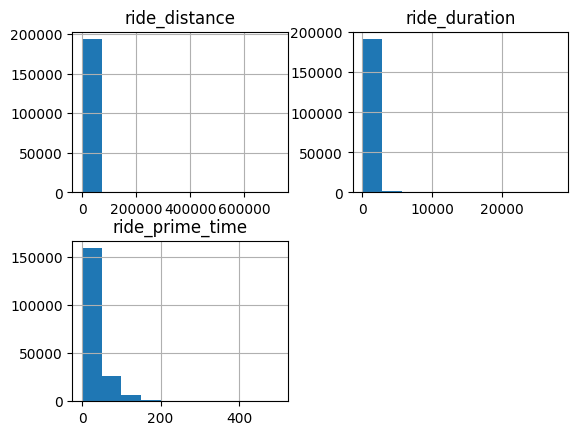

In [17]:
# The following graph shows us that we have important outliers in all of our varibles, it's important to consider this at the moment of creating measurements
rides_complete.hist()

<Axes: xlabel='ride_distance'>

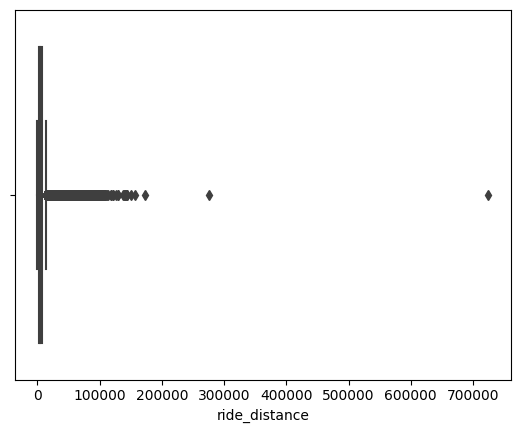

In [18]:
sns.boxplot(data = rides_complete, x = 'ride_distance')

<Axes: xlabel='ride_duration'>

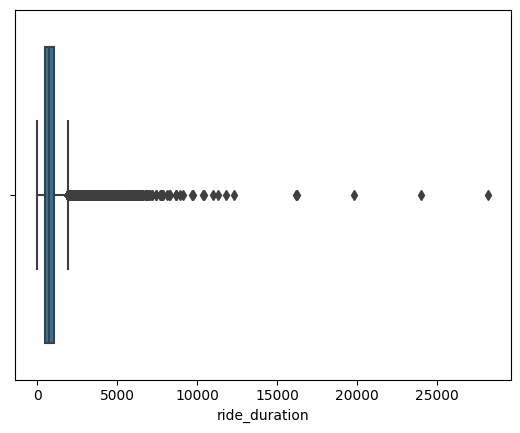

In [19]:
sns.boxplot(data = rides_complete, x = 'ride_duration')

<Axes: xlabel='ride_prime_time'>

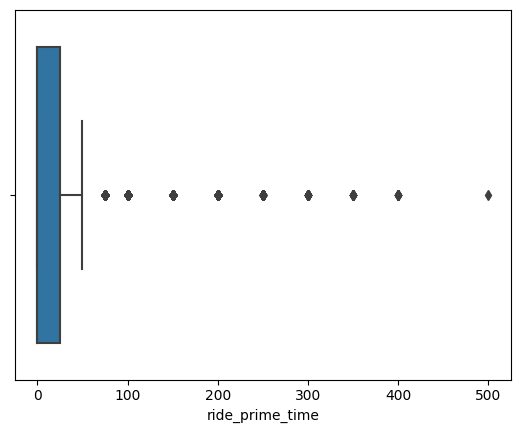

In [20]:
sns.boxplot(data = rides_complete, x = 'ride_prime_time')

In [21]:
# General statistics from dataset
# 1. We can see that we have negative distance as an error within the data
# 2. From the previous graphs, we could noticed the outliers, now with the following information we can observe the numerical representation

rides_complete.describe()

,ride_distance,ride_duration,ride_prime_time
count,193502.00,193502.00,193502.00
mean,6955.22,858.97,17.31
std,8929.44,571.38,30.83
min,-2.00,2.00,0.00
25%,2459.00,491.00,0.00
50%,4015.00,727.00,0.00
75%,7193.00,1069.00,25.00
max,724679.00,28204.00,500.00


**With this section we've understood the outliers within the data, once we calculate the trip fare, we'll decide if this data should be remove or this data even though is an outlier is a valid trip, however for performaing averages these data points should be removed if we don't want to move our mean on a misleading direction**

## **3.4. Identification of relationships between variable pairs**

**All kind of modeling needs to understand the correlations from the existing features in order to decide which atributes select (Feature engineering)**

In [22]:
rides_complete.corr()

<ipython-input-22-e3f3f3ba6015>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  rides_complete.corr()


,ride_distance,ride_duration,ride_prime_time
ride_distance,1.00,0.79,-0.05
ride_duration,0.79,1.00,0.01
ride_prime_time,-0.05,0.01,1.00


**As we can see we have a strong relational between the ride duration and the ride distance, that is logic**

# **4. Data wrangling**
Once performed the exploratory data analysis (EDA), now is time to give a better format to our data and correct missing values

## **4.1 Change data types and adjust data**


In [23]:
# Deleting rows with negative distances and times
rides_complete = rides_complete[rides_complete['ride_distance'] >= 0]
rides_complete = rides_complete[rides_complete['ride_duration'] >= 0]

In [24]:
# Cast date columns to date type
rides_complete["requested_at"] = pd.to_datetime(rides_complete["requested_at"], format="%Y/%m/%d %H:%M:%S")
rides_complete["accepted_at"] = pd.to_datetime(rides_complete["accepted_at"], format="%Y/%m/%d %H:%M:%S")
rides_complete["arrived_at"] = pd.to_datetime(rides_complete["arrived_at"], format="%Y/%m/%d %H:%M:%S")
rides_complete["picked_up_at"] = pd.to_datetime(rides_complete["picked_up_at"], format="%Y/%m/%d %H:%M:%S")
rides_complete["dropped_off_at"] = pd.to_datetime(rides_complete["dropped_off_at"], format="%Y/%m/%d %H:%M:%S")
driver['driver_onboard_date'] = pd.to_datetime(driver["driver_onboard_date"], format="%Y/%m/%d %H:%M:%S")

In [25]:
# Convert meters to miles
rides_complete['ride_distance'] = rides_complete['ride_distance'] * 0.00062137
# Convert seconds to minutes
rides_complete['ride_duration'] = rides_complete['ride_duration'] / 60
# Convert prime time to percentage
rides_complete['ride_prime_time'] = rides_complete['ride_prime_time'] / 100

In [26]:
# Rename columns
rides_complete = rides_complete.rename(columns = {'ride_distance':'ride_distance_miles', 'ride_duration':'ride_duration_minutes', 'ride_prime_time':'ride_prime_time_prop'})

In [27]:
# Now we can observe that we have the data in the format that we needed
rides_complete.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 193501 entries, 0 to 193501
Data columns (total 10 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   driver_id              193501 non-null  object        
 1   ride_id                193501 non-null  object        
 2   ride_distance_miles    193501 non-null  float64       
 3   ride_duration_minutes  193501 non-null  float64       
 4   ride_prime_time_prop   193501 non-null  float64       
 5   requested_at           184818 non-null  datetime64[ns]
 6   accepted_at            184818 non-null  datetime64[ns]
 7   arrived_at             184817 non-null  datetime64[ns]
 8   picked_up_at           184818 non-null  datetime64[ns]
 9   dropped_off_at         184818 non-null  datetime64[ns]
dtypes: datetime64[ns](5), float64(3), object(2)
memory usage: 16.2+ MB


## **4.2 Delete duplicate rows**


In [28]:
# Deleting duplicate rows has to be done carefully, sometimes it could have a business meaning
rides_complete = rides_complete.drop_duplicates()

# **5. Life Time Value**
Once our data is ready to be processed, we can start modelling, understand and create insights from it

In this case, we will create our LTV equation to find our value based on the following premise:

**LTV = Average fare per trip * Lifetime average trips * Lyft split profit**

## **5.1 Understanding the data**

Before starting to calculate our necessary data to create the LTV equation, we will understand the data regarding the time series trends

In [29]:
# We are going to graph the behavior of trips through time withint weekly bucklets
rides_complete['requested_at_week'] = rides_complete['requested_at'].dt.to_period('W').dt.start_time

In [30]:
# Once created our new column, we need to agrupate the data according to those weekly buckets
rides_per_week = pd.DataFrame(rides_complete.groupby('requested_at_week')['ride_id'].nunique())
rides_per_week.columns = ['Rides']
rides_per_week

,Rides
requested_at_week,
2016-03-28,2498
2016-04-04,5865
2016-04-11,7798
2016-04-18,10292
2016-04-25,13656
2016-05-02,15770
2016-05-09,19551
2016-05-16,19678
2016-05-23,18221


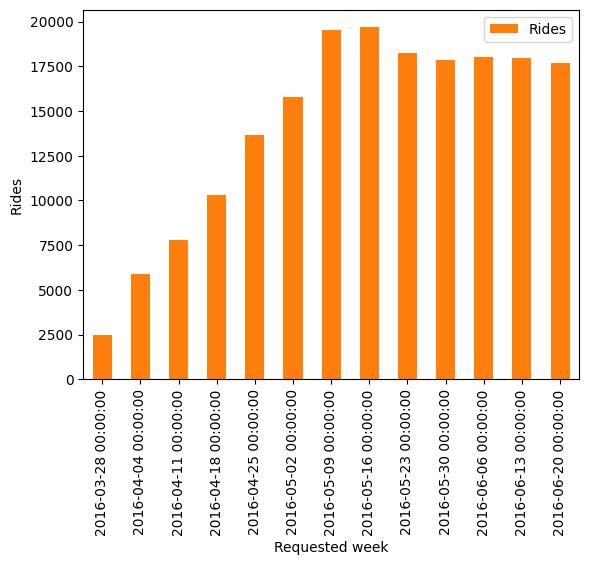

In [31]:
# Creting a graph allow us to visualize if there is a particular trend
ax = rides_per_week.plot(use_index = True, color = color_pal[1], kind = 'bar')
plt.xlabel('Requested week')
plt.ylabel('Rides')
ax.legend(["Rides"])

In [88]:
#rides_per_week.to_csv('rides_per_week.csv')

In [32]:
# After understanding the behavior of the rides, we'll do the same for the drivers
drivers_per_week = pd.DataFrame(rides_complete.groupby('requested_at_week')['driver_id'].nunique())
drivers_per_week.columns = ['Drivers']
drivers_per_week

,Drivers
requested_at_week,
2016-03-28,127
2016-04-04,261
2016-04-11,355
2016-04-18,454
2016-04-25,528
2016-05-02,617
2016-05-09,669
2016-05-16,629
2016-05-23,604


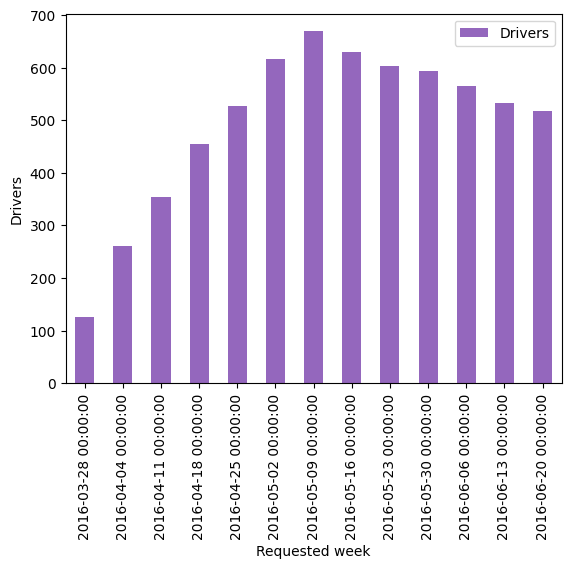

In [33]:
ax = drivers_per_week.plot(use_index = True, color = color_pal[4], kind = 'bar')
plt.xlabel('Requested week')
plt.ylabel('Drivers')
ax.legend(["Drivers"])

In [90]:
drivers_per_week.to_csv('drivers_per_week.csv')

In [34]:
# After reviewing both trends (rides & drivers) we can notice there is a stron relation between the number of rides and drivers week over week
# Merging both data sets allow us to calculate the correlations between the varbles to have a numerical sense of these correlation
weekly_behavior = rides_per_week.merge(drivers_per_week, on='requested_at_week', how='inner').copy()
weekly_behavior.corr()

,Rides,Drivers
Rides,1.00,0.95
Drivers,0.95,1.00


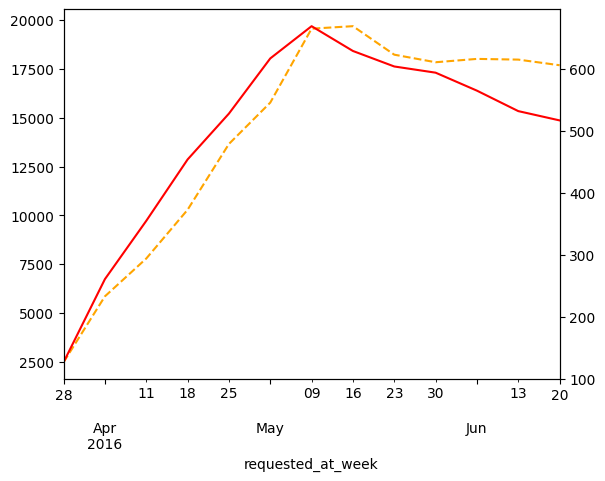

In [35]:
ax =weekly_behavior['Rides'].plot(label = 'Rides', color = 'orange', style = '--')
ax =weekly_behavior['Drivers'].plot(label = 'Drivers', color = 'red', secondary_y = True)

## **5.2 Average fare per trip**
First, we need to calculate the fare per trip, based on the following criteria:

Base Fare         $2.00  

Cost per Mile     $1.15

Cost per Minute   $0.22

Service Fee       $1.75

Minimum Fare      $5.00

Maximum Fare      $400.00  

In [36]:
'''
Fare = Based bare + (Cost per Mile * Ride distance) + (Cost per Minute * Ride duration) + Service Fee
- If fare less than Minimun Fare, then we use Minimun Fare
- If face more than Maximum Fare, then we use Maximum Fare
'''
base_fare = 2
cost_per_mile = 1.15
cost_per_minute = 0.22
service_fee  = 1.75
minimum_fare = 5
maximum_fare = 400
fare = []
#fare = np.empty([1], dtype=float)
for index, row in rides_complete.iterrows():
  fare_sum = base_fare + (cost_per_mile * row['ride_distance_miles']) + (cost_per_minute * row['ride_duration_minutes']) + service_fee
  # Adding prime time multiplier to fare
  fare_sum = fare_sum + (fare_sum*row['ride_prime_time_prop'])

  '''
    Logic to manage the previous outliers that we noticed within the date, such as:
    - Ride duration
    - Ride distance
    - Ride prime time
    All of them had outliers, but understaing the bussiness we stablish a min fare value and a max fare value
  '''
  if fare_sum < minimum_fare:
    fare.append(minimum_fare)
  elif fare_sum > maximum_fare:
    fare.append(maximum_fare)
  else:
    fare.append(fare_sum)

#np.append(fare, base_fare + (cost_per_mile * row['ride_distance']) + (cost_per_minute * row['ride_duration']) + service_fee)

In [37]:
# Adding the new column to the original Data Frame
rides_complete['fare'] = fare

In [38]:
# Confirm minimum and maximum fares
print(rides_complete['fare'].min())
print(rides_complete['fare'].max())

5.0
400.0


In [39]:
# Average fare
rides_complete['fare'].mean()

13.839181433231696

**With this first section we have calculated the average fare for all the trips within the data**

**Average fare = $13.84**

## **5.3 Lifetime average trips**
Now we need to calculate the lifetime average of all drivers

In order to make this we need to have the following assumptions:
  - Lifetime average trips is understood as the number of trips since the onboarding date up to churn.
    - However, drivers could churn multiple times, therefore this will create a periodical behavior, where the driver churns and then comes back and so on and so forth.
    - Also churn normally is consider a driver that hasn't done a ride in the last 4 weeks, due to the data constraint of just 3 months, I'll consider churn drivers as those who hasn't done a trip in **4 weeks or 28 days**
    - Due to we just have a snapshot of the data for 3 months, will be hard to see this periodical behavior, in most of the drivers we are just gonna see the first churn, and due to we can't assure that this driver will come back in the future, we are gonna consider this first churn as our overall churn
  - This overall churn, will allow us to obtain the average driver tenure
    before leaving the platform, therefore the average amount of trips that the drivers reach at the average tenure, will give us the Lifetime average trips. For example: the average tenure is 2 months, then in 2 months the average number of completed trips per driver is 350, then our Lifetime average trips would be 350 trips
  - Each driver has a different level of engagement with the platform, such as:
    - Occasional
    - Part-Time
    - Full-Time
    - Over-Time
    
    However we are gonna consider the average rides as our benchmark

### **5.3.1 Average tenure before leaving the platform (Churn)**

In [40]:
driver.head()

,driver_id,driver_onboard_date
0,002be0ffdc997bd5c50703158b7c2491,2016-03-29
1,007f0389f9c7b03ef97098422f902e62,2016-03-29
2,011e5c5dfc5c2c92501b8b24d47509bc,2016-04-05
3,0152a2f305e71d26cc964f8d4411add9,2016-04-23
4,01674381af7edd264113d4e6ed55ecda,2016-04-29


In [41]:
# The following information tell us the max onboarded date for a driver compare with the last data point of rides that we have
print(driver['driver_onboard_date'].max())
print(rides_complete['requested_at'].max())
# We can observe that the minimum date with the lastest onboarded driver compare with the last data point is of 42 days,
# this will help us because we wil measure churn with 28 days of no ride
print(rides_complete['requested_at'].max() - driver['driver_onboard_date'].max())

2016-05-15 00:00:00
2016-06-26 23:57:45
42 days 23:57:45


In [42]:
# We create this column to visualize the behavior per week
driver['driver_onboard_date_week'] = driver['driver_onboard_date'].dt.to_period('W').dt.start_time

In [43]:
onboarding_drivers_per_week = pd.DataFrame(driver.groupby('driver_onboard_date_week')['driver_id'].nunique())
onboarding_drivers_per_week.columns = ['Drivers']
onboarding_drivers_per_week

,Drivers
driver_onboard_date_week,
2016-03-28,138
2016-04-04,163
2016-04-11,142
2016-04-18,137
2016-04-25,125
2016-05-02,121
2016-05-09,111


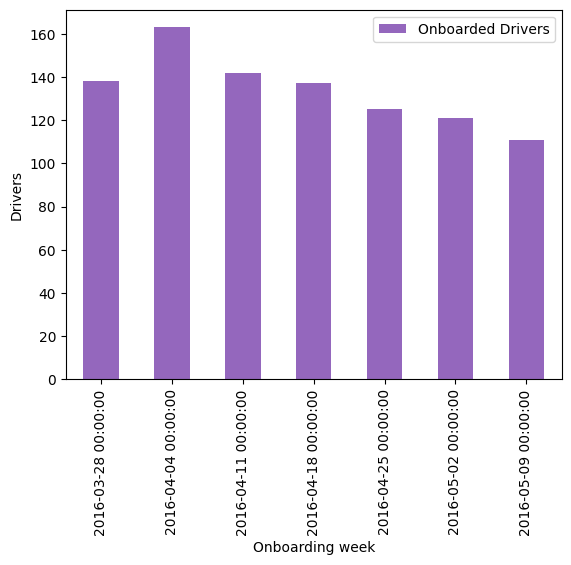

In [44]:
ax = onboarding_drivers_per_week.plot(use_index = True, color = color_pal[4], kind = 'bar')
plt.xlabel('Onboarding week')
plt.ylabel('Drivers')
ax.legend(["Onboarded Drivers"])

In [45]:
# Due to we need the onboarding date, we are gonna merge the data set that we've been working on with the drive's data set
rides_complete = rides_complete.merge(driver, on='driver_id', how='left')
rides_complete.head(1)

,driver_id,ride_id,ride_distance_miles,ride_duration_minutes,ride_prime_time_prop,requested_at,accepted_at,arrived_at,picked_up_at,dropped_off_at,requested_at_week,fare,driver_onboard_date,driver_onboard_date_week
0,002be0ffdc997bd5c50703158b7c2491,006d61cf7446e682f7bc50b0f8a5bea5,1.13,5.45,0.5,2016-04-23 02:13:50,2016-04-23 02:14:15,2016-04-23 02:16:36,2016-04-23 02:16:40,2016-04-23 02:22:07,2016-04-18,9.36,2016-03-29,2016-03-28


In [46]:
rides_complete.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 193501 entries, 0 to 193500
Data columns (total 14 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   driver_id                 193501 non-null  object        
 1   ride_id                   193501 non-null  object        
 2   ride_distance_miles       193501 non-null  float64       
 3   ride_duration_minutes     193501 non-null  float64       
 4   ride_prime_time_prop      193501 non-null  float64       
 5   requested_at              184818 non-null  datetime64[ns]
 6   accepted_at               184818 non-null  datetime64[ns]
 7   arrived_at                184817 non-null  datetime64[ns]
 8   picked_up_at              184818 non-null  datetime64[ns]
 9   dropped_off_at            184818 non-null  datetime64[ns]
 10  requested_at_week         184818 non-null  datetime64[ns]
 11  fare                      193501 non-null  float64       
 12  dr

In [47]:
'''
The following instructions will help us to determine how many days have passed with no ride,
this is measure obtanining the date difference between the last completed ride and the last data point that we have,
this last data point is considered as our last date that we have data
'''
drivers_no_ride = pd.DataFrame(rides_complete['requested_at'].max() - rides_complete.groupby('driver_id')['requested_at'].max()).copy()
drivers_no_ride.columns = ['days_no_ride']
drivers_no_ride = drivers_no_ride.dropna()
drivers_no_ride['days_no_ride'] = (drivers_no_ride['days_no_ride']/ np.timedelta64(1, 'D')).astype(int)
drivers_no_ride

,days_no_ride
driver_id,
002be0ffdc997bd5c50703158b7c2491,3
007f0389f9c7b03ef97098422f902e62,4
011e5c5dfc5c2c92501b8b24d47509bc,14
0152a2f305e71d26cc964f8d4411add9,0
01674381af7edd264113d4e6ed55ecda,2
...,...
ff419a3476e21e269e340b5f1f05414e,0
ff714a67ba8c6a108261cd81e3b77f3a,9
fff482c704d36a1afe8b8978d5486283,45


In [48]:
'''
Once knowing the number of days with no ride, we can create a subset with just the churn drivers,
based on our definition, churn drivers haven't done ride in the last 28 days
'''
churn_drivers = drivers_no_ride[drivers_no_ride['days_no_ride'] >= 28].copy()
active_drivers = drivers_no_ride[drivers_no_ride['days_no_ride'] < 28].copy()
print('Churn drivers: ',churn_drivers.shape)
print('Active drivers: ', active_drivers.shape)
# We can see that from our 844 drivers we can consider churn drivers to 260 drivers

Churn drivers:  (155, 1)
Active drivers:  (689, 1)


In [49]:
# From those churn drivers we need to obtain average tenure in days
# We are gonna retrieve all the characteristics for futher analysis about churn drivers
churn_drivers = churn_drivers.merge(rides_complete, on='driver_id', how='inner')
active_drivers = active_drivers.merge(rides_complete, on='driver_id', how='inner')

In [50]:
print(churn_drivers.shape)
print(churn_drivers['driver_id'].nunique())
churn_drivers.head(1)

(8198, 15)
155


,driver_id,days_no_ride,ride_id,ride_distance_miles,ride_duration_minutes,ride_prime_time_prop,requested_at,accepted_at,arrived_at,picked_up_at,dropped_off_at,requested_at_week,fare,driver_onboard_date,driver_onboard_date_week
0,0213f8b59219e32142711992ca4ec01f,50,0177d0cf5a6638fa17275f3a3abf016a,4.33,13.12,0.0,2016-04-27 02:27:28,2016-04-27 02:27:33,2016-04-27 02:30:11,2016-04-27 02:30:12,2016-04-27 02:43:19,2016-04-25,11.62,2016-04-07,2016-04-04


In [51]:
tenure_churn_drivers = pd.DataFrame(churn_drivers.groupby('driver_id')['requested_at'].max() - churn_drivers.groupby('driver_id')['driver_onboard_date'].min()).copy()
tenure_churn_drivers.columns = ['tenure']
tenure_churn_drivers = tenure_churn_drivers.dropna()
tenure_churn_drivers['tenure'] = (tenure_churn_drivers['tenure']/ np.timedelta64(1, 'D')).astype(int)

In [52]:
# Understaning the left data set
tenure_churn_drivers.shape

(153, 1)

In [53]:
# Same calculation for the active drivers
tenure_active_drivers = pd.DataFrame(active_drivers.groupby('driver_id')['requested_at'].max() - active_drivers.groupby('driver_id')['driver_onboard_date'].min()).copy()
tenure_active_drivers.columns = ['tenure']
tenure_active_drivers = tenure_active_drivers.dropna()
tenure_active_drivers['tenure'] = (tenure_active_drivers['tenure']/ np.timedelta64(1, 'D')).astype(int)

In [87]:
tenure_active_drivers.shape

(684, 1)

In [54]:
# Obtanining our average tenure in days
print('Churn drivers tenure: ', tenure_churn_drivers['tenure'].mean())
print('Active drivers tenure: ', tenure_active_drivers['tenure'].mean())

Churn drivers tenure:  22.901960784313726
Active drivers tenure:  62.271929824561404


array([[<Axes: title={'center': 'tenure'}>]], dtype=object)

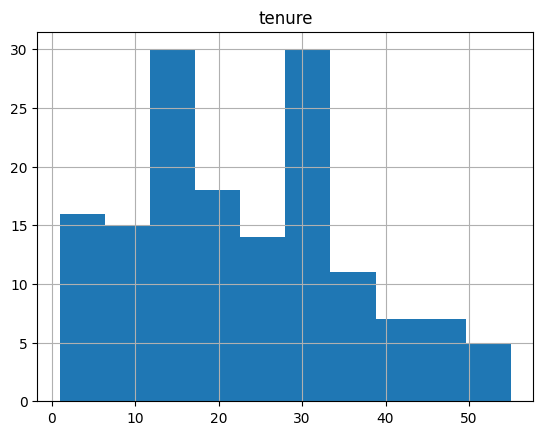

In [55]:
tenure_churn_drivers.hist()

In [86]:
# tenure_churn_drivers.to_csv('tenure_churn_drivers.csv')

**We've obtained the average tenure of 23 days, considering that we have data for roughly 90 days, this number of days make sense as a churn average**

### **5.3.2 Average number of rides during the average tenure**

Now that we have 32 days as the average for how long does a driver stay in the platform after the onboarding date, now we need to calculate how many trips in average the driver is able to complete before leaving.

In [56]:
# We create another column that helps us to determine when the driver will reach the average churn date
# We calculate how many trips the churn drivers were able to complete before reaching the average churn date
churn_drivers['average_end_date'] = churn_drivers['driver_onboard_date'] + pd.Timedelta(days=32)

# Now we segment the data with just the rides below or equal to the previous date
churn_drivers_rides = churn_drivers[churn_drivers['requested_at'] <= churn_drivers['average_end_date']].copy()

# We calculate the ride average in that segment of time
churn_drivers_rides.groupby('driver_id')['ride_id'].nunique().mean()

48.13725490196079

**Now we've calculated the average rides per driver for the first 23 days after the onboarding date: 48 rides**

## **5.4 Lyft split**

As our last component, we have that Lyft will take just a percentage share from the total fare, will be splitted into the driver, taxes, fees, etc. Therefore, actual profit for Lyft will be signigicant lower than the actual final fare, due to I don't have the real data on the split percentage for each ride, **I'll assume Lyft split to be 20% of each ride**

## **5.5 LTV equation**

We've calculated our three components to build the LTV equation:
- Average fare per trip: $13.84 USD
- Lifetime average trips: 48 rides
- Lyft split profit: 20% split (0.2)

LTV = Average fare per trip * Lifetime average trips * Lyft split profit

Substituting the values

##**LTV = 13.84 * 48 * 0.2**

In [57]:
LTV = 13.84 * 48 * 0.2
LTV

132.864

##**Our driver's  LTV is $132 USD**

**NOTE: Identifying churn drivers and active drivers within this data snapshot gave us these results, however the average tenure could be higher, due to a percentage from the active drivers will become churn drivers in the future, therefore the average tenure will increase, the key takeaway is: analyzing a longer period of time would give us a better estimate of the actual average tenure before leaving the platform**

That means that on average each new driver will generate in profit $132 USD to Lyft before leaving the platform.

Having this value is really important due to:
- Will help us to determine the profitability regarding acquisition campaigns.
  - Questions like:
    - How much can we spend on bringing a new driver?
    - Which acquisition channel is more effective?
    - How to design the new acquisition incentive?
- Also can help us to understand how can we improve or LTV, such as:
  - Focus on drivers stages: Acquisition, Funnel, ELC, Long-term engagement
    - Focus on weekly retention
- As well as, engagement level, such as:
  - Understand and analyze drivers at different engagement levels:
    - Occasional
    - Part-Time
    - Full-Time
    - Over-Time

**Knowing and understanding our driver's LTV will help us to create the overall strategy around driver supply**

# **6. Churn drivers**

A churn driver is understood as a driver that hasn't done a ride in 28 days

The following data set contains all the data from drivers that didn't make a ride in at least 28 days

## **6.1. Churn Drivers Overall Characteristics**

First, we'll do some descriptive statistics in order to understand more churn drivers

In [58]:
print('All drivers: ', rides_complete['driver_id'].nunique())
print('Churn driver: ', churn_drivers['driver_id'].nunique())
churn_share =  (churn_drivers['driver_id'].nunique()/rides_complete['driver_id'].nunique())

print('Churn percentage: ', f'{churn_share:.2%}')

All drivers:  937
Churn driver:  155
Churn percentage:  16.54%


In [59]:
# Tenure before churning
tenure = tenure_churn_drivers['tenure'].mean()
print('Average tenure before churning: ', f'{tenure:.0f}', ' days', ' equivalent to ', f'{tenure/7:.1f}', ' weeks')

Average tenure before churning:  23  days  equivalent to  3.3  weeks


In [60]:
# Tenure from Active drivers
tenure = tenure_active_drivers['tenure'].mean()
print('Average tenure from Active drivers: ', f'{tenure:.0f}', ' days', ' equivalent to ', f'{tenure/7:.1f}', ' weeks')

Average tenure from Active drivers:  62  days  equivalent to  8.9  weeks


In [61]:
# Lets compare basic stats from active drivers and churn drivers
active_drivers.describe()

,days_no_ride,ride_distance_miles,ride_duration_minutes,ride_prime_time_prop,fare
count,176620.00,176620.00,176620.00,176620.00,176620.00
mean,2.71,4.31,14.34,0.18,13.85
std,5.38,5.54,9.55,0.31,10.05
min,0.00,0.00,0.03,0.00,5.00
25%,0.00,1.52,8.20,0.00,8.16
50%,0.00,2.48,12.13,0.00,10.84
75%,2.00,4.43,17.83,0.25,15.63
max,27.00,450.29,470.07,5.00,400.00


In [62]:
churn_drivers.describe()

,days_no_ride,ride_distance_miles,ride_duration_minutes,ride_prime_time_prop,fare
count,8198.00,8198.00,8198.00,8198.00,8198.00
mean,46.89,4.48,14.16,0.14,13.66
std,14.01,5.70,9.47,0.30,10.11
min,28.00,0.00,0.10,0.00,5.00
25%,35.00,1.58,7.98,0.00,8.02
50%,43.00,2.62,12.00,0.00,10.74
75%,55.00,4.88,17.61,0.25,15.49
max,88.00,171.64,188.23,3.00,242.55


Observing the previous data, we can conclude the following statements:

- The average expected time for a driver to churn is 3.3 weeks
- The churn drivers represent the 16.54% of all drivers (that means that a driver is more likely to stay longer than 3.3 weeks, for how long? we'll need more data to find that value)
- Between a churn driver and a active driver we could notice basically no change in stats, just a slightly difference in fare and ride prime time, a little bit higher for the active drivers

## **6.2. Churn Drivers Trends**

Second, let's analyze the trends before churning.

Initial hypothesis, a decrease in engagement week over week

### **6.2.1 Churn Drivers Analysis**


In [63]:
'''
We group by the requested week and driver id to obtain the number of rides per driver and per week,
then we calcule the week over week percentage change of each driver across the time,
in order to visualize if there is a decreasing trend each week with the churn drivers
'''
churn_weekly_behavior = pd.DataFrame(churn_drivers.groupby(['requested_at_week', 'driver_id'])['ride_id'].count())
churn_weekly_behavior.reset_index(inplace=True, level=['driver_id'])
churn_weekly_behavior['week_over_week'] = churn_weekly_behavior.groupby('driver_id').pct_change(1)
churn_weekly_behavior

,driver_id,ride_id,week_over_week
requested_at_week,,,
2016-03-28,02e440f6c209206375833cef02e0cbae,4,NaN
2016-03-28,0eff1404b137a5562642f0f706e59f25,17,NaN
2016-03-28,1110d496149d3d8c50276765924df831,2,NaN
2016-03-28,173a168d2b8830525f59be85a35f0000,34,NaN
2016-03-28,432754fe9722d008cd7328f34852de61,19,NaN
...,...,...,...
2016-05-23,da8f13b0ebc53fe1147d982f087b5806,3,0.50
2016-05-23,ed0c7d2a0d5f60d527c0c3643495ddca,4,-0.20
2016-05-23,f1a2419d56c2a09edf4030caeebeb5b6,8,-0.27


In [64]:
# Example of driver behavior and week over week percentage change
churn_weekly_behavior[churn_weekly_behavior['driver_id'] == '02e440f6c209206375833cef02e0cbae']

,driver_id,ride_id,week_over_week
requested_at_week,,,
2016-03-28,02e440f6c209206375833cef02e0cbae,4,NaN
2016-04-04,02e440f6c209206375833cef02e0cbae,2,-0.50
2016-04-18,02e440f6c209206375833cef02e0cbae,33,15.50
2016-04-25,02e440f6c209206375833cef02e0cbae,8,-0.76
2016-05-09,02e440f6c209206375833cef02e0cbae,8,0.00
2016-05-16,02e440f6c209206375833cef02e0cbae,1,-0.88


In [65]:
# Now having the week over week change, we can assign labels such as: Negative or Positive trend
trend =[]
for index, value in churn_weekly_behavior.iterrows():
  '''
  The following logic is:
  - Negative to all week over week less than 0
  - Positive to all week over week greater or equal to 0
  - No value to all the first weeks, we can't calculate that value, because we don't have previous value
  '''
  if value['week_over_week'] < 0:
    trend.append('Negative')
  elif value['week_over_week'] >= 0:
    trend.append('Positive')
  else:
    trend.append('No value')
churn_weekly_behavior['trend'] = trend
churn_weekly_behavior

,driver_id,ride_id,week_over_week,trend
requested_at_week,,,,
2016-03-28,02e440f6c209206375833cef02e0cbae,4,NaN,No value
2016-03-28,0eff1404b137a5562642f0f706e59f25,17,NaN,No value
2016-03-28,1110d496149d3d8c50276765924df831,2,NaN,No value
2016-03-28,173a168d2b8830525f59be85a35f0000,34,NaN,No value
2016-03-28,432754fe9722d008cd7328f34852de61,19,NaN,No value
...,...,...,...,...
2016-05-23,da8f13b0ebc53fe1147d982f087b5806,3,0.50,Positive
2016-05-23,ed0c7d2a0d5f60d527c0c3643495ddca,4,-0.20,Negative
2016-05-23,f1a2419d56c2a09edf4030caeebeb5b6,8,-0.27,Negative


In [66]:
# We are gonna limit the analysis for just the last 4 active weeks (last 4 weeks before churning)
churn_weekly_behavior.reset_index(inplace = True)
churn_weekly_behavior['rank'] = churn_weekly_behavior[['requested_at_week', 'driver_id']].groupby('driver_id').rank(method="first", ascending=False)
churn_weekly_behavior = churn_weekly_behavior[churn_weekly_behavior['rank'] <= 4]
churn_weekly_behavior

,requested_at_week,driver_id,ride_id,week_over_week,trend,rank
1,2016-03-28,0eff1404b137a5562642f0f706e59f25,17,NaN,No value,4.0
2,2016-03-28,1110d496149d3d8c50276765924df831,2,NaN,No value,2.0
3,2016-03-28,173a168d2b8830525f59be85a35f0000,34,NaN,No value,3.0
6,2016-03-28,548a85a2fbb4986fd7a632566e8cb9c3,19,NaN,No value,4.0
7,2016-03-28,55d7b17732745057aff29fcd0ce13014,2,NaN,No value,4.0
...,...,...,...,...,...,...
551,2016-05-23,da8f13b0ebc53fe1147d982f087b5806,3,0.50,Positive,1.0
552,2016-05-23,ed0c7d2a0d5f60d527c0c3643495ddca,4,-0.20,Negative,1.0
553,2016-05-23,f1a2419d56c2a09edf4030caeebeb5b6,8,-0.27,Negative,1.0
554,2016-05-23,fb83fc6555a4f700fd92630d9fcb9cea,7,-0.63,Negative,1.0


In [67]:
# Example of driver behavior and week over week percentage change
churn_weekly_behavior[churn_weekly_behavior['driver_id'] == '02e440f6c209206375833cef02e0cbae']

,requested_at_week,driver_id,ride_id,week_over_week,trend,rank
172,2016-04-18,02e440f6c209206375833cef02e0cbae,33,15.50,Positive,4.0
254,2016-04-25,02e440f6c209206375833cef02e0cbae,8,-0.76,Negative,3.0
418,2016-05-09,02e440f6c209206375833cef02e0cbae,8,0.00,Positive,2.0
487,2016-05-16,02e440f6c209206375833cef02e0cbae,1,-0.88,Negative,1.0


In [92]:
#churn_weekly_behavior.to_csv('churn_weekly_behavior.csv')

In [68]:
# As we can see the overall behavior of the churn drivers if a Negative trend
churn_weekly_behavior.groupby('trend')['driver_id'].count()

trend
Negative    198
No value    119
Positive    177
Name: driver_id, dtype: int64

In [69]:
# We will obtain a average of the negative trends for those 4 weeks
negative = churn_weekly_behavior[churn_weekly_behavior['trend'] == 'Negative'].copy()
negative_trend = pd.DataFrame(negative.groupby('driver_id')['trend'].count())
negative_trend = negative_trend/4
negative_trend.mean()


trend    0.38
dtype: float64

In [70]:
# We will obtain a average of the positive trends for those 4 weeks
positive = churn_weekly_behavior[churn_weekly_behavior['trend'] == 'Positive'].copy()
positive_trend = pd.DataFrame(positive.groupby('driver_id')['trend'].count())
positive_trend = positive_trend/4
positive_trend.mean()

trend    0.4
dtype: float64

### **6.2.2 Active Drivers Analysis**


In [71]:
# Doing the same analysis for active drivers
active_weekly_behavior = pd.DataFrame(active_drivers.groupby(['requested_at_week', 'driver_id'])['ride_id'].count())
active_weekly_behavior.reset_index(inplace=True, level=['driver_id'])
active_weekly_behavior['week_over_week'] = active_weekly_behavior.groupby('driver_id').pct_change(1)
active_weekly_behavior

,driver_id,ride_id,week_over_week
requested_at_week,,,
2016-03-28,002be0ffdc997bd5c50703158b7c2491,26,NaN
2016-03-28,007f0389f9c7b03ef97098422f902e62,1,NaN
2016-03-28,0938ed763cb3129ae63607aaf69daff5,12,NaN
2016-03-28,0c02bd2b09f7193103279ab9b760b777,10,NaN
2016-03-28,14183e69946d782c92eb53b3c6eeb86f,6,NaN
...,...,...,...
2016-06-20,fe35f74209d1056dd315ddb17681203d,6,5.00
2016-06-20,fe469488a23d4bdda47b83a659dcc103,11,4.50
2016-06-20,ff419a3476e21e269e340b5f1f05414e,37,0.95


In [72]:
# Now having the week over week change, we can assign labels such as: Negative or Positive trend
trend =[]
for index, value in active_weekly_behavior.iterrows():
  '''
  The following logic is:
  - Negative to all week over week less than 0
  - Positive to all week over week greater or equal to 0
  - No value to all the first weeks, we can't calculate that value, because we don't have previous value
  '''
  if value['week_over_week'] < 0:
    trend.append('Negative')
  elif value['week_over_week'] >= 0:
    trend.append('Positive')
  else:
    trend.append('No value')
active_weekly_behavior['trend'] = trend
active_weekly_behavior

,driver_id,ride_id,week_over_week,trend
requested_at_week,,,,
2016-03-28,002be0ffdc997bd5c50703158b7c2491,26,NaN,No value
2016-03-28,007f0389f9c7b03ef97098422f902e62,1,NaN,No value
2016-03-28,0938ed763cb3129ae63607aaf69daff5,12,NaN,No value
2016-03-28,0c02bd2b09f7193103279ab9b760b777,10,NaN,No value
2016-03-28,14183e69946d782c92eb53b3c6eeb86f,6,NaN,No value
...,...,...,...,...
2016-06-20,fe35f74209d1056dd315ddb17681203d,6,5.00,Positive
2016-06-20,fe469488a23d4bdda47b83a659dcc103,11,4.50,Positive
2016-06-20,ff419a3476e21e269e340b5f1f05414e,37,0.95,Positive


In [73]:
# We are gonna limit the analysis for just the last 4 active weeks (last 4 weeks before churning)
active_weekly_behavior.reset_index(inplace = True)
active_weekly_behavior['rank'] = active_weekly_behavior[['requested_at_week', 'driver_id']].groupby('driver_id').rank(method="first", ascending=False)
active_weekly_behavior = active_weekly_behavior[active_weekly_behavior['rank'] <= 4]
active_weekly_behavior

,requested_at_week,driver_id,ride_id,week_over_week,trend,rank
18,2016-03-28,2ebb15757eae00c4c491f569ca1a72a4,17,NaN,No value,3.0
41,2016-03-28,7f4350f4a358ac264ccf3b10c4966afc,35,NaN,No value,2.0
85,2016-03-28,f86eb77e1cefe28e9f0e9d3775fae261,29,NaN,No value,3.0
133,2016-04-04,2ebb15757eae00c4c491f569ca1a72a4,11,-0.35,Negative,2.0
140,2016-04-04,3777e15bb2eb838394a372e119d96462,14,NaN,No value,3.0
...,...,...,...,...,...,...
5891,2016-06-20,fe35f74209d1056dd315ddb17681203d,6,5.00,Positive,1.0
5892,2016-06-20,fe469488a23d4bdda47b83a659dcc103,11,4.50,Positive,1.0
5893,2016-06-20,ff419a3476e21e269e340b5f1f05414e,37,0.95,Positive,1.0
5894,2016-06-20,fffecccc49436c5389075b13209f0dfa,45,-0.31,Negative,1.0


In [74]:
active_weekly_behavior.groupby('trend')['driver_id'].count()

trend
Negative    1313
No value      43
Positive    1381
Name: driver_id, dtype: int64

In [75]:
# We will obtain a average of the negative trends for those 4 weeks
negative = active_weekly_behavior[active_weekly_behavior['trend'] == 'Negative'].copy()
negative_trend = pd.DataFrame(negative.groupby('driver_id')['trend'].count())
negative_trend = negative_trend/4
negative_trend.mean()

trend    0.49
dtype: float64

In [76]:
# We will obtain a average of the negative trends for those 4 weeks
positive = active_weekly_behavior[active_weekly_behavior['trend'] == 'Positive'].copy()
positive_trend = pd.DataFrame(positive.groupby('driver_id')['trend'].count())
positive_trend = positive_trend/4
positive_trend.mean()

trend    0.51
dtype: float64

# **7. %   of   Active   Drivers   over   time**

In [77]:
# We create our weekly active drivers data set
behavior_active = pd.DataFrame(rides_complete.groupby('requested_at_week')['driver_id'].nunique()).copy()
behavior_active.reset_index(inplace = True)
behavior_active.columns = ['week','active_drivers']
behavior_active

,week,active_drivers
0,2016-03-28,127
1,2016-04-04,261
2,2016-04-11,355
3,2016-04-18,454
4,2016-04-25,528
5,2016-05-02,617
6,2016-05-09,669
7,2016-05-16,629
8,2016-05-23,604
9,2016-05-30,594


In [78]:
# We create our weekly onboarded drivers data set
behavior = pd.DataFrame(driver.groupby('driver_onboard_date_week')['driver_id'].nunique()).copy()
behavior_onboarding = pd.DataFrame(behavior['driver_id'].cumsum()).copy()
behavior_onboarding.reset_index(inplace = True)
behavior_onboarding.columns = ['week','onboarded_drivers']
behavior_onboarding

,week,onboarded_drivers
0,2016-03-28,138
1,2016-04-04,301
2,2016-04-11,443
3,2016-04-18,580
4,2016-04-25,705
5,2016-05-02,826
6,2016-05-09,937


In [79]:
# We join our two previous data sets to create our new data set were we are gonna calculate de % of active drivers
active_drivers_percentage = behavior_active.merge(behavior_onboarding, on = 'week', how = 'inner')
active_drivers_percentage['Active_%'] = active_drivers_percentage['active_drivers']/ active_drivers_percentage['onboarded_drivers']
active_drivers_percentage

,week,active_drivers,onboarded_drivers,Active_%
0,2016-03-28,127,138,0.92
1,2016-04-04,261,301,0.87
2,2016-04-11,355,443,0.80
3,2016-04-18,454,580,0.78
4,2016-04-25,528,705,0.75
5,2016-05-02,617,826,0.75
6,2016-05-09,669,937,0.71


In [98]:
#active_drivers_percentage.to_csv('active_drivers_percentage.csv')

# **8. Driver segmentation**

In order to segment the drivers we'll use the level of engagement with the platform, in order to make this segmentation we are gonna use the average rides per week of each driver as the level of engagement.

## **8.1. Engagement level**
In order to segment the drivers we'll use the level of engagement with the platform, in order to make this segmentation we are gonna use the average rides per week of each driver as the level of engagement.

In [80]:
# First, of all we need the average of rides per week of the drivers
drivers_weekly = pd.DataFrame(rides_complete.groupby(['requested_at_week', 'driver_id'])['ride_id'].count())
drivers_weekly.reset_index(inplace = True, level = ['driver_id'])
drivers_weekly = pd.DataFrame(drivers_weekly.groupby('driver_id')['ride_id'].mean()).copy()
drivers_weekly.reset_index(inplace = True)
drivers_weekly.columns = ['driver_id', 'rides_per_week_avg']
drivers_weekly

,driver_id,rides_per_week_avg
0,002be0ffdc997bd5c50703158b7c2491,21.31
1,007f0389f9c7b03ef97098422f902e62,3.44
2,011e5c5dfc5c2c92501b8b24d47509bc,4.25
3,0152a2f305e71d26cc964f8d4411add9,23.88
4,01674381af7edd264113d4e6ed55ecda,41.67
...,...,...
839,ff419a3476e21e269e340b5f1f05414e,26.89
840,ff714a67ba8c6a108261cd81e3b77f3a,40.42
841,fff482c704d36a1afe8b8978d5486283,5.83
842,fffecccc49436c5389075b13209f0dfa,50.75


array([[<Axes: title={'center': 'rides_per_week_avg'}>]], dtype=object)

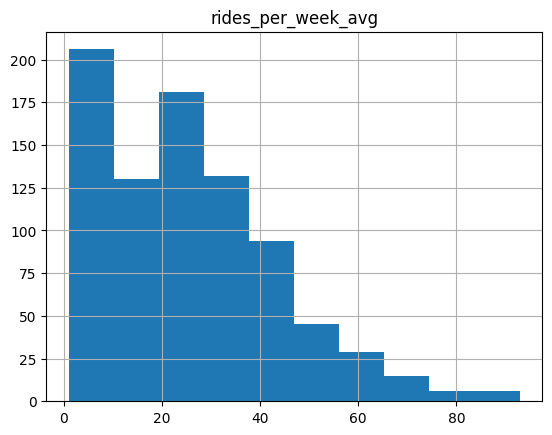

In [81]:
# We create a histogram to observe the distribution of the average of all the drivers
drivers_weekly.hist()

We are gonna assume the following the division for the drivers:
- Occasional: Less than 20 rides per week
- Part-Time: Between 20 and 40 rides per week
- Full-Time: Between 40 rides and 60 rides per week
- Over-Time: More than 60 rides per week

In [82]:
# Let's create this logic as a column within our data set
engagement = []
for index, row in drivers_weekly.iterrows():
  if row['rides_per_week_avg'] > 60:
    engagement.append('over-time')
  elif row['rides_per_week_avg'] > 40:
    engagement.append('full-time')
  elif row['rides_per_week_avg'] > 20:
    engagement.append('part-time')
  elif row['rides_per_week_avg'] <= 20:
    engagement.append('ocassional')
  else:
    engagement.append('error')

drivers_weekly['engagement'] = engagement
drivers_weekly

,driver_id,rides_per_week_avg,engagement
0,002be0ffdc997bd5c50703158b7c2491,21.31,part-time
1,007f0389f9c7b03ef97098422f902e62,3.44,ocassional
2,011e5c5dfc5c2c92501b8b24d47509bc,4.25,ocassional
3,0152a2f305e71d26cc964f8d4411add9,23.88,part-time
4,01674381af7edd264113d4e6ed55ecda,41.67,full-time
...,...,...,...
839,ff419a3476e21e269e340b5f1f05414e,26.89,part-time
840,ff714a67ba8c6a108261cd81e3b77f3a,40.42,full-time
841,fff482c704d36a1afe8b8978d5486283,5.83,ocassional
842,fffecccc49436c5389075b13209f0dfa,50.75,full-time


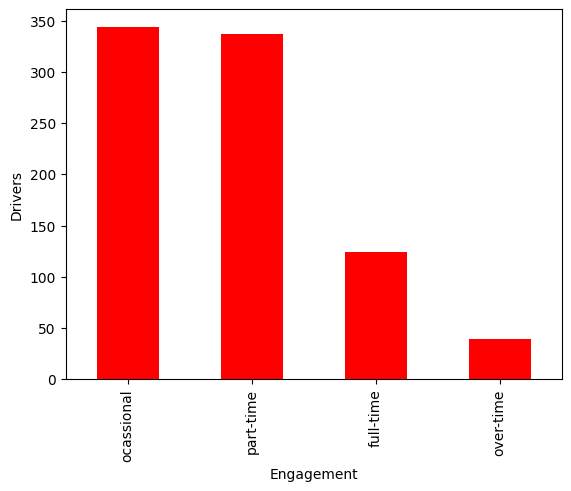

,driver_id
ocassional,344
part-time,337
full-time,124
over-time,39


In [83]:
order = ['ocassional', 'part-time', 'full-time', 'over-time']
engagement_level = pd.DataFrame(drivers_weekly.groupby('engagement')['driver_id'].nunique(), index = order).copy()

# Observing the distribution in a graph and in a table
engagement_level.plot(kind="bar", legend=False, color = 'red')
plt.xlabel('Engagement')
plt.ylabel('Drivers')
plt.show()
engagement_level

In [91]:
engagement_level.to_csv('engagement_level.csv')

**As we can observe most of our drivers are on low levels of engagement, that means there is a big opportunity to increase the number of rides without acquiring more drivers, but by increasing the engagement of current drivers**

## **8.2. Engagement level related to churn**

Now that we've calculated the engagement level of the drivers, we are gonna join this data with the churn drivers to understand if we have a relation between the level of engagement and churn

In [94]:
# Joining the drivers and the engagement level CHURN DRIVERS
churn_drivers_list = pd.DataFrame(churn_drivers['driver_id'].unique())
churn_drivers_list.columns = ['driver_id']
churn_engage = pd.DataFrame(churn_drivers_list.merge(drivers_weekly, on = 'driver_id', how = 'inner').groupby('engagement')['driver_id'].count(), index = order)
churn_engage

,driver_id
ocassional,122
part-time,26
full-time,6
over-time,1


In [95]:
#churn_engage.to_csv('churn_engage.csv')

In [96]:
# Joining the drivers and the engagement level ACTIVE DRIVERS
active_drivers_list = pd.DataFrame(active_drivers['driver_id'].unique())
active_drivers_list.columns = ['driver_id']
active_engage = pd.DataFrame(active_drivers_list.merge(drivers_weekly, on = 'driver_id', how = 'inner').groupby('engagement')['driver_id'].count(), index = order)
active_engage

,driver_id
ocassional,222
part-time,311
full-time,118
over-time,38


In [97]:
#active_engage.to_csv('active_engage.csv')

**This information is really important, because we can see a strong relation between the level of engagement and churning**

# **9. The end**
We conclude this analysis, with the google slides presentation we'll cover the highlights and the business recommendations

**Thanks**
